<a href="https://colab.research.google.com/github/TillVollmer5/DSF-FS2022-Till-Vollmer/blob/main/CodingTask1_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

1. Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
2. Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
3. Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
4.Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
5.Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]


### Task 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DSF/4ms_10av_30s_Absorbance_10-32-04-868.txt'

Mounted at /content/drive


In [6]:
import pandas as pd
df = pd.read_csv(path, delimiter='\t', header=13) # the \t means tab. The data table starts at line 13
df.to_csv('stripped_data.csv') # save df to a new file
df.head()

,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [7]:
!ls -1

drive
sample_data
stripped_data.csv


In [4]:
df.iloc[0,1780:1950]

550.2471     0.05292
550.3744    0.053003
550.5017    0.054883
550.629     0.053532
550.7562    0.053558
              ...   
571.1854    0.011174
571.3119    0.010964
571.4384    0.010868
571.5649    0.010631
571.6914    0.008914
Name: 0, Length: 170, dtype: object

### Task 2.1

We simplify the task a little bit and just assumes 7 wavelengths per nm. The number actually vary a bit, from 6-8 or so.

In [5]:
df.iloc[0,50:80]

323.1135    -0.03757
323.2488        -0.0
323.3841   -1.154587
323.5194   -0.233014
323.6547    0.585513
323.79      0.434691
323.9252    -0.24709
324.0605        -0.0
324.1958        -0.0
324.331         -0.0
324.4663        -0.0
324.6015        -0.0
324.7368   -0.864203
324.872         -0.0
325.0073     0.03042
325.1425    0.244356
325.2777   -0.753639
325.413    -0.064156
325.5482    0.189408
325.6834     0.14198
325.8186        -0.0
325.9538        -0.0
326.089    -0.799471
326.2242   -0.136737
326.3594   -0.229182
326.4946    0.389443
326.6298   -0.291111
326.7649   -0.193055
326.9001    0.135063
327.0353    0.049756
Name: 0, dtype: object

In [9]:
#%%timeit r=1 
def dfReduce(dfR,n):
  for i in range(0,df.shape[0]):
    s   = 2
    t   = 2
    for j in range(s,df.shape[-1],n):
      if (s+n)>df.shape[-1]: n=df.shape[-1]-s
      sum = 0.0
      for k in range(s,s+n):
        sum+= dfR.iloc[i,k]
      dfR.iloc[i,t]=sum/n
      #print(t,dfR.iloc[i,s])
      s +=n
      t +=1
  return dfR.iloc[:,0:t]
i=7
for fname in ['dfR1.csv']:  # ,'dfR2.csv','dfR3.csv','dfR4.csv']:
  dfR = df.copy()
  dfR = dfReduce(dfR,i)
  i += 7  # About 7 wavelengths per nm
  dfR.to_csv(fname)

KeyboardInterrupt: ignored

###Task 2.2

In [25]:
%%timeit -r 1
def dfRed(fname,n):
  new_df = df.copy()
  new_df = new_df.iloc[:,2:-1]
  new_df = new_df.groupby([[i//n for i in range(0,new_df.shape[-1])]], axis = 1).mean()
  new_df.insert(0,'Time', (df.iloc[:,1]-df.iloc[0,1])/1000)
  new_df.to_csv(fname)
  return new_df
for i in range(1,2): dfr = dfRed('dfR'+str(i)+'.csv',i*7)
dfr.head()
#unfortunatly column names are gone --> hard to do this

1 loop, best of 1: 658 ms per loop


### Task 3

0

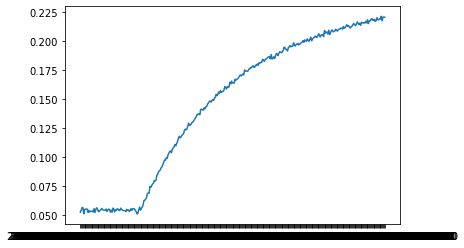

In [11]:
import matplotlib.pyplot as plt
def plotWaveLengthDiff(a,b):
  x = df.iloc[:,0]
  y = -(df.iloc[:,b]-df.iloc[:,a])
  plt.plot(x,y)
  return(0)
# I give column numbers instead of wavelengths, i.e. instead of column names
plotWaveLengthDiff(1750,1950)

### Task 4

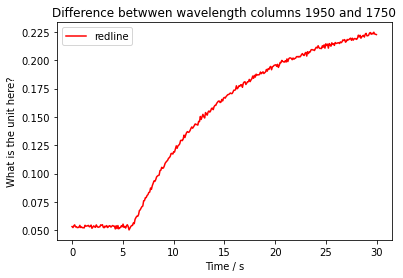

In [22]:
b = 1950
a = 1750
for i in [1,7,14,21,28]:
  df1 = dfRed('dfR1.csv',1)
  x = df1.iloc[:,0]
  y = -(df1.iloc[:,b]-df1.iloc[:,a])
plt.plot(x,y,c='r',label='redline')
plt.xlabel('Time / s')
plt.ylabel('What is the unit here?')
plt.title('Difference betwwen wavelength columns '+str(b)+' and '+str(a))
plt.legend()
plt.savefig('myplot.png')

In [16]:
%ls -l

total 15404
-rw-r--r-- 1 root root  3627475 Mar 23 15:36 dfR1.csv
drwx------ 5 root root     4096 Mar 23 15:22 drive/
drwxr-xr-x 1 root root     4096 Mar  9 14:48 sample_data/
-rw-r--r-- 1 root root 12135554 Mar 23 15:23 stripped_data.csv


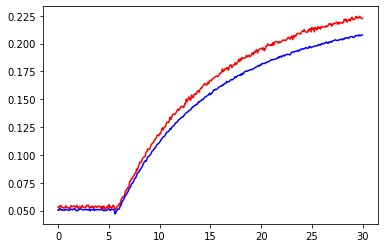

In [24]:
b = 1950
a = 1750
for i in [1,7]: #,14,21,28]: # higher column grouping gives funny plots, so only for two first
  b=int(b/i)
  a=int(a/i)
  df1 = dfRed('dfR1.csv',i)
  x = df1.iloc[:,0]
  y = -(df1.iloc[:,b]-df1.iloc[:,a])
  if i == 1:
    col='r'
  elif i == 7:
    col='b'
  plt.plot(x,y,c=col,label=str(i))

There is a difference between the not compressed and the compressed data. Does it have to do with the not exact wavelength transformation when compressing or is it a real difference. We would have to investigate further. 